<a href="https://colab.research.google.com/github/luca-nassano/ChestXRAY/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
tf.random.set_seed(42)

In [0]:
def parse(x):
  return np.array(x.strip('][').split(', '),dtype=np.float32)
  
def build_dataset(df):
  df['Embedding'] = df['Embedding'].apply(lambda x: parse(x))
  values = df['Embedding'].values
  X = np.array([el for el in values])
  #Y = df[df.columns[1:-1]].values
  return X

In [0]:
df = pd.read_csv('/content/drive/My Drive/Embedding/DenseNet169/training_densenet169.csv')

In [0]:
df_pneumonia = df[df['Pneumonia'] == 1][0:91]

In [0]:
df_pneumonia.to_csv('/content/drive/My Drive/Covid/df_pneumonia_densenet169.csv',index=False)

In [0]:
df_covid = pd.read_csv('/content/drive/My Drive/Covid/Embedding Covid/embedding_densenet169.csv')

In [0]:
df_covid = df_covid[df_covid['label'] == 'COVID-19']

In [0]:
df_covid

,filename,label,Embedding
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,COVID-19,"[0.0, 0.005684979259967804, 0.0081745954230427..."
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,COVID-19,"[0.0, 0.00876727793365717, 0.00902311783283948..."
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,COVID-19,"[0.0, 0.009666219353675842, 0.0090331928804516..."
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,COVID-19,"[0.0, 0.00852179154753685, 0.00743095343932509..."
4,nejmc2001573_f1a.jpeg,COVID-19,"[0.0, 0.0063009969890117645, 0.008990103378891..."
...,...,...,...
109,5e6dd879fde9502400e58b2f.jpeg,COVID-19,"[0.0, 0.007751211989670992, 0.0081331990659236..."
110,covid-19-pneumonia-19.jpg,COVID-19,"[0.0, 0.007427221164107323, 0.0074234288185834..."
111,kjr-21-e25-g001-l-a.jpg,COVID-19,"[0.0, 0.00553102744743228, 0.00783602520823478..."
112,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg,COVID-19,"[0.0, 0.008056397549808025, 0.0078065521083772..."


In [0]:
df_no_covid = pd.DataFrame({'filename' : df_pneumonia['Path'],
                            'label': df_pneumonia['Pneumonia'],
                            'Embedding': df_pneumonia['Embedding']})

In [0]:
df_no_covid

,filename,label,Embedding
6,CheXpert-v1.0-small/train/patient06179/study2/...,1.0,"[0.0, 0.008590316399931908, 0.0076303747482597..."
25,CheXpert-v1.0-small/train/patient15810/study17...,1.0,"[0.0, 0.00958317145705223, 0.00993316154927015..."
87,CheXpert-v1.0-small/train/patient50077/study1/...,1.0,"[0.0, 0.0065795197151601315, 0.008377856574952..."
89,CheXpert-v1.0-small/train/patient09573/study3/...,1.0,"[0.0, 0.006813548039644957, 0.0079320007935166..."
257,CheXpert-v1.0-small/train/patient26588/study3/...,1.0,"[0.0, 0.006036381237208843, 0.0078550139442086..."
...,...,...,...
4006,CheXpert-v1.0-small/train/patient38528/study2/...,1.0,"[0.0, 0.009525722824037075, 0.0109352394938468..."
4021,CheXpert-v1.0-small/train/patient18874/study1/...,1.0,"[0.0, 0.008962917141616344, 0.0088569009676575..."
4090,CheXpert-v1.0-small/train/patient35924/study2/...,1.0,"[0.0, 0.008736494928598404, 0.0097381267696619..."
4091,CheXpert-v1.0-small/train/patient10527/study5/...,1.0,"[0.0, 0.011120597831904888, 0.0114790443331003..."


In [0]:
final_df = df_covid.append(df_no_covid)

In [0]:
final_df = final_df.sample(frac=1,random_state = 42)

In [0]:
final_df

,filename,label,Embedding
31,jkms-35-e79-g001-l-a.jpg,COVID-19,"[0.0, 0.0056323762983083725, 0.008728952147066..."
65,7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg,COVID-19,"[0.0, 0.007862228900194168, 0.0059073809534311..."
2773,CheXpert-v1.0-small/train/patient21675/study3/...,1,"[0.0, 0.009283849969506264, 0.0097440173849463..."
335,CheXpert-v1.0-small/train/patient12968/study1/...,1,"[0.0, 0.008658231236040592, 0.0075969817116856..."
2370,CheXpert-v1.0-small/train/patient46669/study1/...,1,"[0.0, 0.009121323935687542, 0.0085116503760218..."
...,...,...,...
520,CheXpert-v1.0-small/train/patient42330/study4/...,1,"[0.0, 0.00620920630171895, 0.00839552842080593..."
26,ryct.2020200034.fig2.jpeg,COVID-19,"[0.0, 0.004110401961952448, 0.0071432869881391..."
25,CheXpert-v1.0-small/train/patient15810/study17...,1,"[0.0, 0.00958317145705223, 0.00993316154927015..."
4090,CheXpert-v1.0-small/train/patient35924/study2/...,1,"[0.0, 0.008736494928598404, 0.0097381267696619..."


In [0]:
final_df.loc[final_df.label == '1.0','label'] = 0
final_df.loc[final_df.label == 'COVID-19','label'] = 1

In [0]:
final_df.to_csv('/content/drive/My Drive/Covid/densenet169_df.csv',index=False)

# Model


In [0]:
def build_dataset(df):
  X = np.array([el for el in df.Embedding.values])
  Y = df.label.values
  return X,Y

In [0]:
def parse(x):
  return np.array(x.strip('][').split(', '),dtype=np.float32)
  
def build_dataset(df):
  df['Embedding'] = df['Embedding'].apply(lambda x: parse(x))
  values = df['Embedding'].values
  X = np.array([el for el in values])
  Y = df.label.values
  return X, Y

In [0]:
df = pd.read_csv('/content/drive/My Drive/Covid/densenet121_df.csv')

In [0]:
X, Y = build_dataset(df)

# Random Forest

In [0]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits = 10, shuffle = True)
rfc = RandomForestClassifier(n_jobs=-1,
                             bootstrap= True,max_depth = 30,
                             max_features= 'sqrt',
                             min_samples_leaf= 1,min_samples_split= 10,n_estimators= 200)

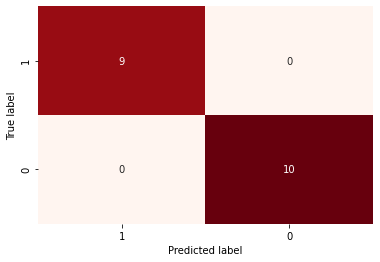

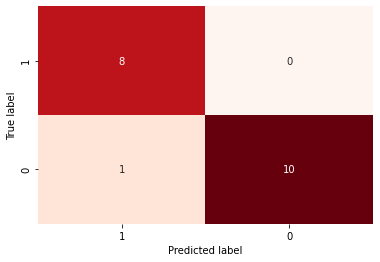

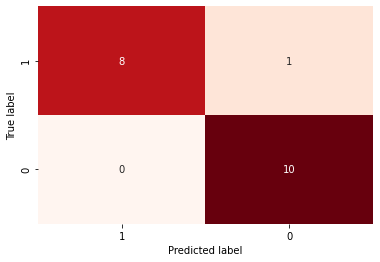

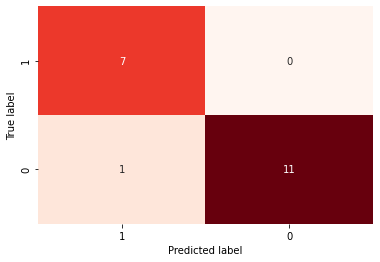

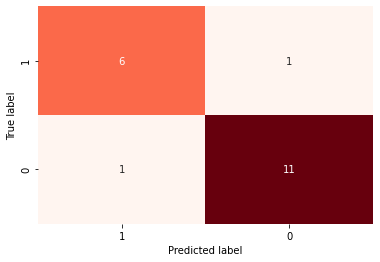

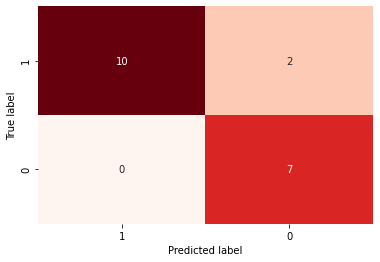

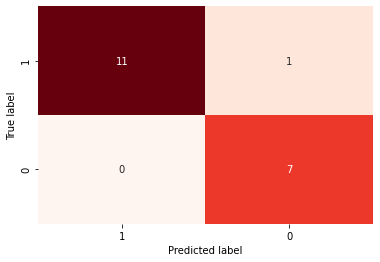

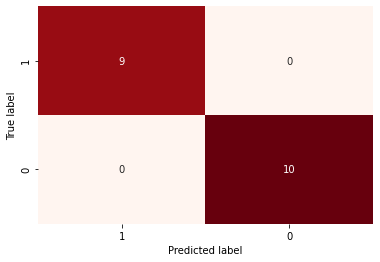

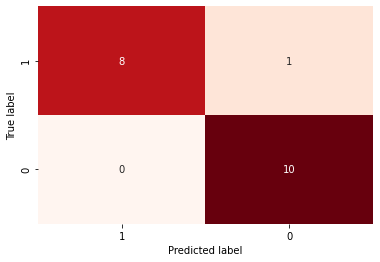

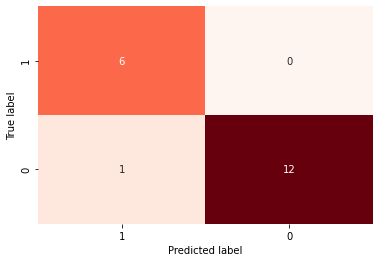

Accuracy per Iteration:  [1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.8947368421052632, 0.8947368421052632, 0.9473684210526315, 1.0, 0.9473684210526315, 0.9473684210526315]
Average K-Fold Accuracy : 0.9473684210526315


AUC per Iteration:  [1.0, 0.9545454545454546, 0.9444444444444444, 0.9583333333333333, 0.8869047619047619, 0.9166666666666667, 0.9583333333333333, 1.0, 0.9444444444444444, 0.9615384615384616]
Average K-Fold AUC : 0.9525210900210901


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import seaborn as sns
scores = []
auc = []
for i in range(10):
  result = next(kf.split(X,Y))
  train_X = X[result[0]]
  train_Y = Y[result[0]]
  test_X = X[result[1]]
  test_Y = Y[result[1]]
  model = rfc.fit(train_X,train_Y)
  predictions = model.predict(test_X)
  cm = confusion_matrix(test_Y,predictions)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',cbar = False,yticklabels=[1,0],xticklabels=[1,0])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
  scores.append(model.score(test_X,test_Y))
  roc_auc = roc_auc_score(test_Y,predictions)
  auc.append(roc_auc)
print('Accuracy per Iteration: ', scores)
print('Average K-Fold Accuracy :' , np.mean(scores))

print('\n')

print('AUC per Iteration: ', auc)
print('Average K-Fold AUC :' , np.mean(auc))

# XGBoost

In [0]:
import xgboost as xgb
xg = xgb.XGBClassifier(max_depth = 2,n_estimators = 200,n_jobs = -1,learning_rate= 0.05,
         subsample= 0.8,
         colsample_bytree=1,
         gamma=1)

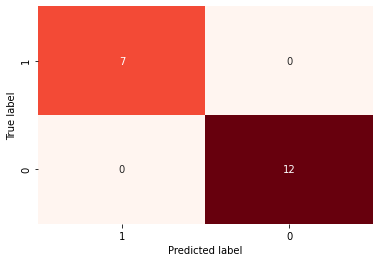

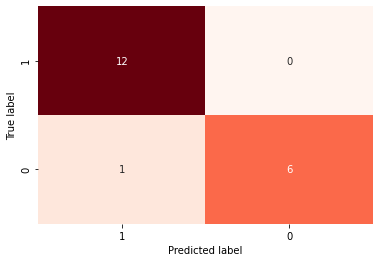

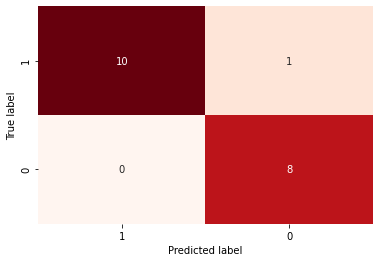

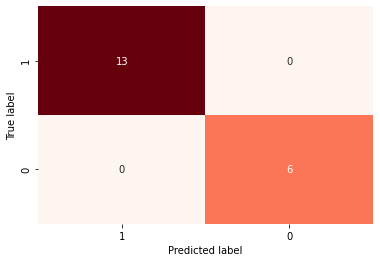

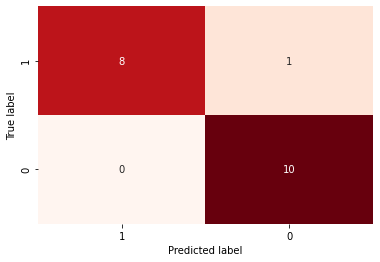

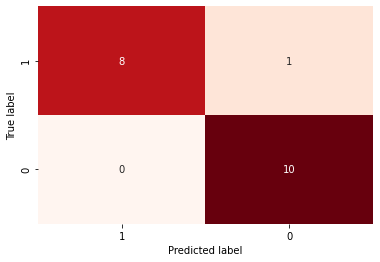

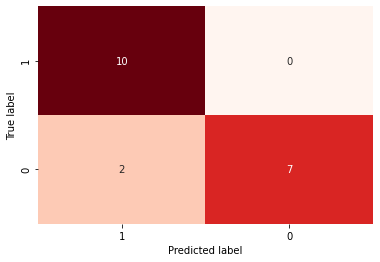

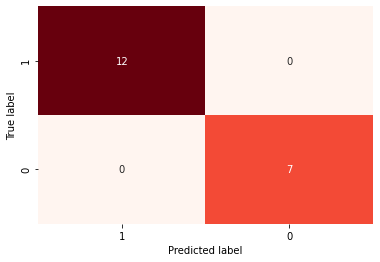

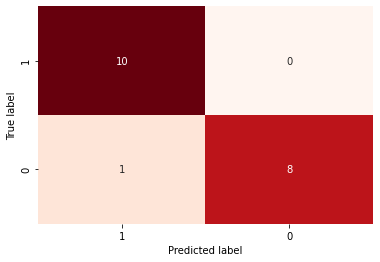

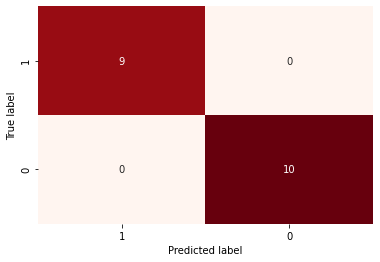

Accuracy per Iteration:  [1.0, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9473684210526315, 0.9473684210526315, 0.8947368421052632, 1.0, 0.9473684210526315, 1.0]
Average K-Fold Accuracy : 0.9631578947368421


AUC per Iteration:  [1.0, 0.9285714285714286, 0.9545454545454545, 1.0, 0.9444444444444444, 0.9444444444444444, 0.8888888888888888, 1.0, 0.9444444444444444, 1.0]
Average K-Fold AUC : 0.9605339105339106


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns

scores = []
auc = []
for i in range(10):
  result = next(kf.split(X,Y))
  train_X = X[result[0]]
  train_Y = Y[result[0]]
  test_X = X[result[1]]
  test_Y = Y[result[1]]
  model = xg.fit(train_X,train_Y)
  predictions = model.predict(test_X)
  cm = confusion_matrix(test_Y,predictions)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',cbar = False,yticklabels=[1,0],xticklabels=[1,0])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show() 
  scores.append(model.score(test_X,test_Y))
  roc_auc = roc_auc_score(test_Y,predictions)
  auc.append(roc_auc)
  
print('Accuracy per Iteration: ', scores)
print('Average K-Fold Accuracy :' , np.mean(scores))

print('\n')

print('AUC per Iteration: ', auc)
print('Average K-Fold AUC :' , np.mean(auc))